In [3]:
import numpy as np

In [ ]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Dense(32,input_shapre=(784,)))
model.add(layers.Dense(32))


In [13]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)


17465344/17464789 [==============================] - 239s 14us/step


In [15]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
max([max(sequence) for sequence in train_data])

9999

In [19]:
word_index = imdb.get_word_index() 
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
 [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 22s 13us/step


In [20]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [21]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [22]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [32]:
from keras import losses
from keras import metrics
from keras import optimizers

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 301us/step - loss: 0.4976 - acc: 0.7778 - val_loss: 0.3974 - val_acc: 0.8386
Epoch 2/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.2930 - acc: 0.9041 - val_loss: 0.2979 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.2148 - acc: 0.9297 - val_loss: 0.2866 - val_acc: 0.8858
Epoch 4/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1692 - acc: 0.9431 - val_loss: 0.3052 - val_acc: 0.8767
Epoch 5/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1356 - acc: 0.9589 - val_loss: 0.3084 - val_acc: 0.8789
Epoch 6/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1097 - acc: 0.9681 - val_loss: 0.3021 - val_acc: 0.8822
Epoch 7/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.0873 - acc: 0.9746 - val_loss: 0.3304 -

In [37]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

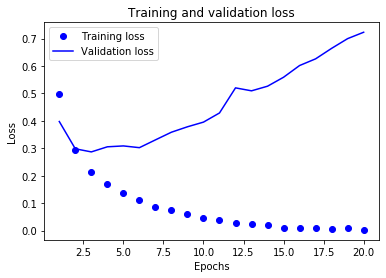

In [39]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


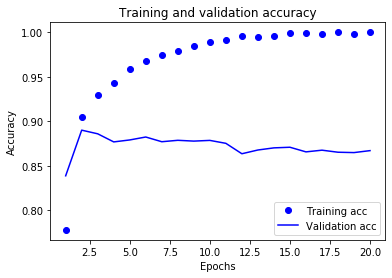

In [40]:
acc = history_dict['acc'] 
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.4462 - accuracy: 0.8174
Epoch 2/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2547 - accuracy: 0.9108
Epoch 3/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.1961 - accuracy: 0.9306
Epoch 4/4
25000/25000 [==============================] - 17s 667us/step


In [42]:
results


[0.29524515049934386, 0.8831200003623962]

In [43]:
model.predict(x_test)

array([[0.22485763],
       [0.99941933],
       [0.80373466],
       ...,
       [0.11835128],
       [0.05725262],
       [0.5934775 ]], dtype=float32)